In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [75]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [77]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [79]:
grouped_df = (
    df
    .groupby('Дата')
    .size()
    .reset_index(name='Количество продаж')
)

Вывести несколько первых строк сгруппированных данных

In [81]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

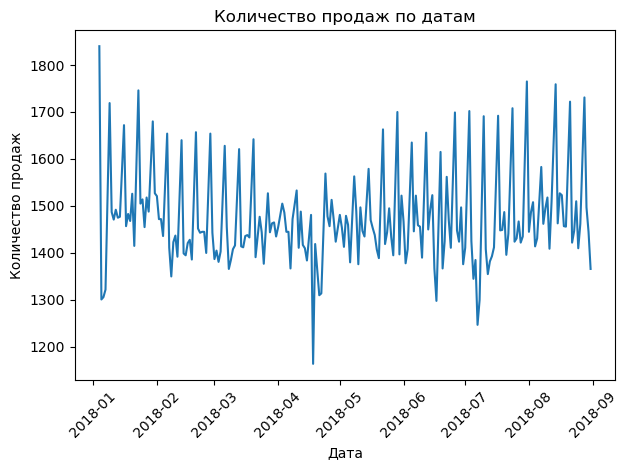

In [83]:
plt.figure()
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'])
plt.title('Количество продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
#На графике отображена динамика количества продаж по датам.Видно, что продажи имеют неравномерный характер: присутствуют периоды роста и спада.
#В отдельные дни наблюдаются резкие пики, которые могут быть связаны с акциями, выходными или массовыми закупками.Также можно отметить базовый уровень продаж, вокруг которого происходят колебания.
#Общего монотонного тренда (строго роста или падения) не наблюдается, что говорит о сезонных или событийных факторах.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [85]:
max_outlier = grouped_df.loc[grouped_df['Количество продаж'].idxmax()]
max_outlier

Дата                 2018-01-04 00:00:00
Количество продаж                   1840
Name: 0, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [87]:
df['Месяц'] = df['Дата'].dt.month
df['День_недели'] = df['Дата'].dt.weekday  # 2 = среда

filtered = df[
    (df['День_недели'] == 2) &
    (df['Месяц'].isin([6, 7, 8])) &
    (df['Склад'] == 3)
]

top_product = (
    filtered
    .groupby('Номенклатура')
    .size()
    .reset_index(name='Продажи')
    .sort_values('Продажи', ascending=False)
    .head(1)
)

top_product

,Номенклатура,Продажи
1,product_1,521


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [27]:
weather = pd.read_csv(
    r'C:/Users/maken/Academica Python/Финальный проект/weather.csv',
    sep=';',
    encoding='cp1251',
    decimal=','
)

In [55]:
weather.head()

,Местное время в Астане,T,Дата,Дата_день
0,31.08.2018 23:00,19.4,2018-08-31 23:00:00,2018-08-31
1,31.08.2018 20:00,25.9,2018-08-31 20:00:00,2018-08-31
2,31.08.2018 17:00,30.2,2018-08-31 17:00:00,2018-08-31
3,31.08.2018 14:00,29.6,2018-08-31 14:00:00,2018-08-31
4,31.08.2018 11:00,27.7,2018-08-31 11:00:00,2018-08-31


In [35]:
# дата
weather['Дата'] = pd.to_datetime(
    weather['Местное время в Астане'],
    format='%d.%m.%Y %H:%M'
)

In [45]:
weather['Дата_день'] = weather['Дата'].dt.date

In [49]:
weather_daily = (
    weather
    .groupby('Дата_день', as_index=False)['T']
    .mean()
)

In [51]:
weather_daily['Дата'] = pd.to_datetime(weather_daily['Дата_день'])
weather_daily = weather_daily[['Дата', 'T']]

In [63]:
weather_daily.head()
weather_daily.dtypes


Дата    datetime64[ns]
T              float64
dtype: object

In [57]:
weather['Дата_день'] = weather['Дата'].dt.date

In [61]:
weather_daily.head()


,Дата,T
0,2018-01-04,-14.0750
1,2018-01-05,-16.8625
2,2018-01-06,-13.3000
3,2018-01-07,-12.7500
4,2018-01-08,-15.4125


In [89]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])


In [91]:
merged = grouped_df.merge(
    weather_daily,
    on='Дата',
    how='inner'
)

In [93]:
merged.head()
merged.shape

(205, 3)

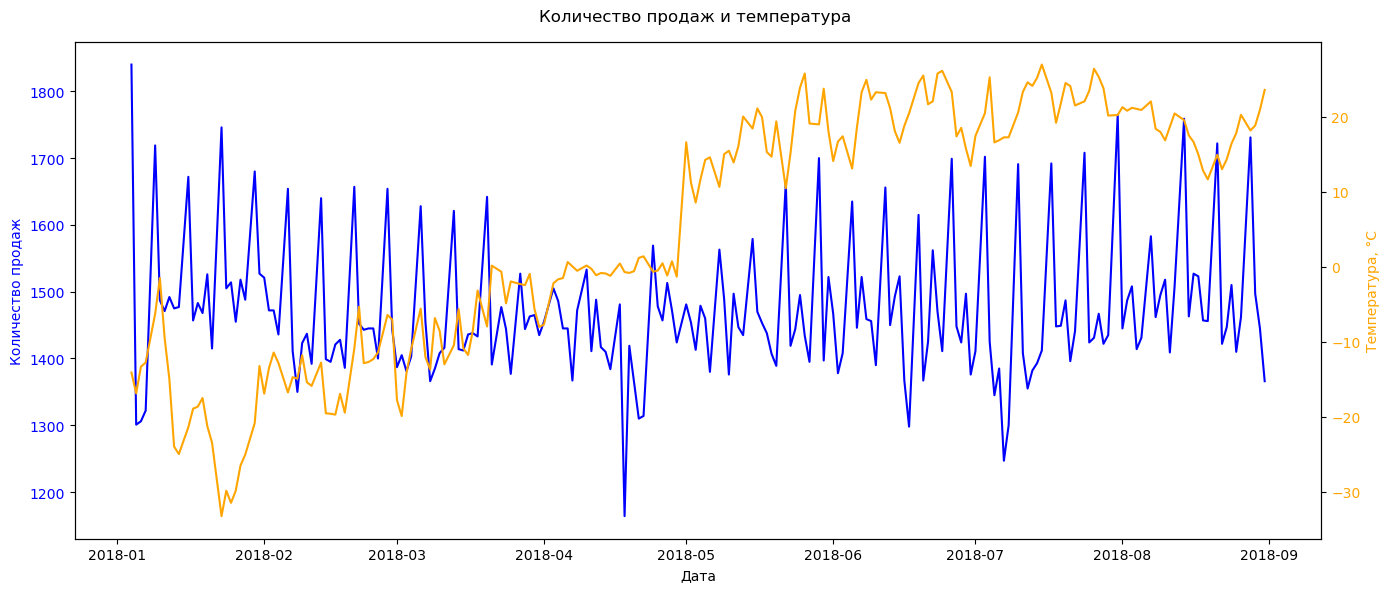

In [99]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(
    merged['Дата'],
    merged['Количество продаж'],
    color='blue',
    label='Количество продаж'
)
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(
    merged['Дата'],
    merged['T'],
    color='orange',
    label='Температура'
)
ax2.set_ylabel('Температура, °C', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Количество продаж и температура')

fig.tight_layout()
plt.show()


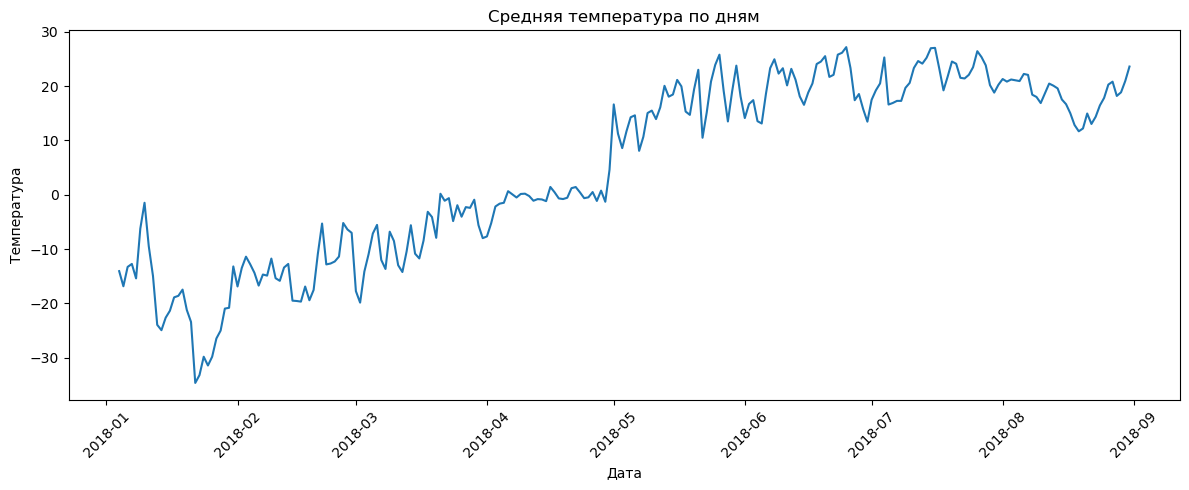

In [97]:
plt.figure(figsize=(12,5))
plt.plot(weather_daily['Дата'], weather_daily['T'])
plt.title('Средняя температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
